In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [139]:
customerdata=pd.read_csv("C:\\Users\\Rohith varma\\Downloads\\QVI_purchase_behaviour.csv")

In [138]:
transactiondata=pd.read_excel("C:\\Users\\Rohith varma\\Downloads\\QVI_transaction_data.xlsx")

In [168]:
trans_df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
PACK_SIZE         0
BRAND_NAME        0
dtype: int64

In [140]:
trans_df = transactiondata.copy() 
trans_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [141]:
trans_df['DATE'] = pd.to_datetime(trans_df['DATE'], unit='D', origin='1899-12-30')
print(trans_df['DATE'].dtype)

datetime64[ns]


In [5]:
df_purchase_behav.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [142]:
#remove digits for prod name 
prod_name = trans_df['PROD_NAME'].str.replace(r'[0-9]+[gG]','');

In [143]:
prod_name = prod_name.str.replace(r'&',' ');

In [144]:
word_counts=pd.Series(' '.join(prod_name).split()).value_counts()

with pd.option_context('display.max_rows', None): 
  display(word_counts)

Chips              49770
Kettle             41288
Smiths             28860
Salt               27976
Cheese             27890
Pringles           25102
Doritos            24962
Crinkle            23960
Corn               22063
Original           21560
Cut                20754
Chip               18645
Chicken            18577
Salsa              18094
Chilli             15390
Sea                14145
Thins              14075
Sour               13882
Crisps             12607
Vinegar            12402
RRD                11894
Sweet              11060
Infuzions          11057
Supreme            10963
Chives             10951
Cream              10723
WW                 10320
Cobs                9693
Popd                9693
Tortilla            9580
Tostitos            9471
Twisties            9454
BBQ                 9434
Sensations          9429
Lime                9347
Old                 9324
Dip                 9324
El                  9324
Paso                9324
Tomato              7669


In [145]:
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1689-12-23 00:00:00.000043390,1,1000,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1689-12-23 00:00:00.000043599,1,1307,66,CCs Nacho Cheese 175g,3,6.3
2,1689-12-23 00:00:00.000043605,1,1343,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,1689-12-23 00:00:00.000043329,2,2373,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,1689-12-23 00:00:00.000043330,2,2426,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [146]:
trans_df = trans_df[trans_df['PROD_NAME'].str.contains(r"[Ss]alsa") == False] #remove salsa from the dataset

In [147]:
trans_df.shape

(246742, 8)

In [149]:
summary=transactiondata.describe()

In [150]:
summary

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [151]:
outlier_rows=trans_df[trans_df['PROD_QTY']==200]
print(outlier_rows)

            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [152]:
trans_df=trans_df[trans_df['LYLTY_CARD_NBR'] !=226000]

In [153]:
trans_df.describe() #prod quantity is now free of outlier.

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [154]:
count = trans_df.groupby(trans_df['DATE'].dt.date).size().reset_index(name = 'COUNT')
count.shape

(364, 2)

In [11]:
df_transaction.nunique()

DATE                364
STORE_NBR           272
LYLTY_CARD_NBR    72637
PROD_NBR            114
PROD_NAME           114
PROD_QTY              6
TOT_SALES           112
dtype: int64

In [155]:
trans_df.sort_values(by='DATE')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
9161,2018-07-01,88,88140,86914,25,Pringles SourCream Onion 134g,2,7.4
155442,2018-07-01,60,60276,57330,3,Kettle Sensations Camembert & Fig 150g,2,9.2
181349,2018-07-01,199,199014,197623,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6
229948,2018-07-01,35,35052,31630,11,RRD Pc Sea Salt 165g,1,3.0
104647,2018-07-01,72,72104,71038,20,Doritos Cheese Supreme 330g,2,11.4
...,...,...,...,...,...,...,...,...
10254,2019-06-30,112,112141,114611,98,NCC Sour Cream & Garden Chives 175g,2,6.0
113220,2019-06-30,207,207155,205513,99,Pringles Sthrn FriedChicken 134g,2,7.4
229182,2019-06-30,10,10140,9882,12,Natural Chip Co Tmato Hrb&Spce 175g,2,6.0
229015,2019-06-30,6,6258,6047,29,French Fries Potato Chips 175g,1,3.0


In [156]:
date_counts = trans_df.groupby('DATE').size()

In [157]:
pd.date_range(start = '2018-07-01', end = '2019-06-30' ).difference(date_counts.index) #it is christmas day so there are no sales.

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [158]:
trans_df.insert(8, "PACK_SIZE", trans_df['PROD_NAME'].str.extract('(\d+)').astype(float), True)

In [159]:
trans_df.sort_values(by='PACK_SIZE')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
40783,2018-09-25,97,97067,96696,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
42461,2019-05-05,110,110030,111890,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
176183,2018-12-30,82,82183,81660,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
227309,2018-12-03,236,236091,239098,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
42418,2018-11-05,109,109217,111470,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
...,...,...,...,...,...,...,...,...,...
192034,2019-03-12,100,100121,99145,4,Dorito Corn Chp Supreme 380g,2,13.0,380.0
255797,2019-01-19,235,235098,238018,4,Dorito Corn Chp Supreme 380g,2,13.0,380.0
233814,2019-01-24,151,151102,149810,4,Dorito Corn Chp Supreme 380g,1,6.5,380.0
131573,2018-07-09,213,213087,212416,4,Dorito Corn Chp Supreme 380g,2,13.0,380.0


In [ ]:
#min pack size is 70 and max pack size is 380.

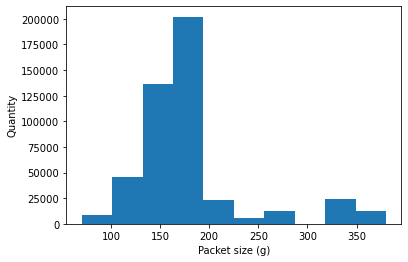

In [160]:
plt.hist(trans_df['PACK_SIZE'], weights=trans_df['PROD_QTY']);
plt.xlabel('Packet size (g)');
plt.ylabel('Quantity');

In [161]:
trans_df.insert(9, "BRAND_NAME",trans_df['PROD_NAME'].str.split().str.get(0), True)
trans_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175.0,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170.0,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0,Doritos


In [162]:
trans_df["BRAND_NAME"].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [163]:
def replace_brandname(line):
    name = line['BRAND_NAME']
    if name == "Infzns":
        return "Infuzions"
    elif name == "Red":
        return "Red Rock Deli"
    elif name == "RRD":
        return "Red Rock Deli"
    elif name == "Grain":
        return "Grain Waves"
    elif name == "GrnWves":
        return "Grain Waves"
    elif name == "Snbts":
        return "Sunbites"
    elif name == "Natural":
        return "Natural Chip Co"
    elif name == "NCC":
        return "Natural Chip Co"
    elif name == "WW":
        return "Woolworths"
    elif name == "Smith":
        return "Smiths"
    elif name == "Dorito":
        return "Doritos"
    else:
        return name 
trans_df["BRAND_NAME"] = trans_df.apply(lambda line: replace_brandname(line), axis=1)

trans_df["BRAND_NAME"].unique()

array(['Natural Chip Co', 'CCs', 'Smiths', 'Kettle', 'Grain Waves',
       'Doritos', 'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'Red Rock Deli', 'Pringles', 'Tyrrells', 'Cobs',
       'French', 'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

In [172]:
def fun(s):
    a=[]
    for i in s:
        if i in ['0','1','2','3','4','5','6','7','8','9']:
            a.append(i)
    return int("".join(a))

In [175]:
trans_df['PACKAGE_SIZE']=trans_df['PROD_NAME'].apply(fun)
trans_df.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,PACKAGE_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural Chip Co,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle,150


<AxesSubplot:xlabel='PACKAGE_SIZE', ylabel='BRAND_NAME'>

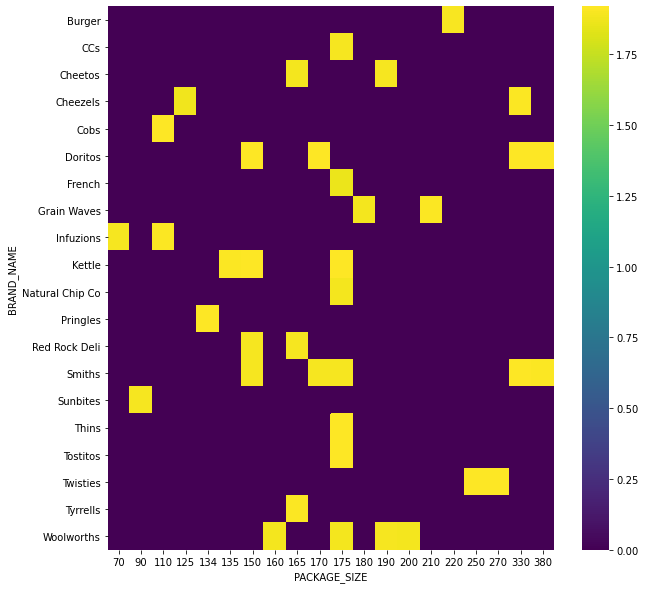

In [178]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.pivot_table(data=trans_df,index='BRAND_NAME',columns='PACKAGE_SIZE',values='PROD_QTY').fillna(0),cmap='viridis')

In [164]:
#now will see Customer Data.

In [165]:
cust_df = customerdata.copy()
cust_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [166]:
cust_df = cust_df.rename(columns={'PREMIUM_CUSTOMER': 'MEMBER_TYPE'})


In [167]:
cust_df.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [169]:
cust_df["LIFESTAGE"].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [179]:
cust_df.describe(include='all')

,LYLTY_CARD_NBR,LIFESTAGE,MEMBER_TYPE
count,7.263700e+04,72637,72637
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,1.361859e+05,NaN,NaN
std,8.989293e+04,NaN,NaN
min,1.000000e+03,NaN,NaN
25%,6.620200e+04,NaN,NaN
50%,1.340400e+05,NaN,NaN
75%,2.033750e+05,NaN,NaN


In [170]:
full_df = trans_df.set_index('LYLTY_CARD_NBR').join(cust_df.set_index('LYLTY_CARD_NBR'))
full_df = full_df.reset_index()
full_df = full_df.sort_values(by='DATE').reset_index(drop=True)
full_df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,LIFESTAGE,MEMBER_TYPE
0,21037,2018-07-01,21,17576,62,Pringles Mystery Flavour 134g,2,7.4,134.0,Pringles,RETIREES,Mainstream
1,25040,2018-07-01,25,21704,87,Infuzions BBQ Rib Prawn Crackers 110g,2,7.6,110.0,Infuzions,OLDER FAMILIES,Budget
2,59236,2018-07-01,59,55555,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0,Doritos,OLDER SINGLES/COUPLES,Budget
3,271083,2018-07-01,271,268688,97,RRD Salt & Vinegar 165g,2,6.0,165.0,Red Rock Deli,YOUNG FAMILIES,Budget
4,65015,2018-07-01,65,61737,17,Kettle Sensations BBQ&Maple 150g,2,9.2,150.0,Kettle,YOUNG FAMILIES,Premium
...,...,...,...,...,...,...,...,...,...,...,...,...
246735,48160,2019-06-30,48,44051,11,RRD Pc Sea Salt 165g,2,6.0,165.0,Red Rock Deli,RETIREES,Mainstream
246736,175371,2019-06-30,175,176890,40,Thins Chips Seasonedchicken 175g,2,6.6,175.0,Thins,OLDER SINGLES/COUPLES,Budget
246737,203312,2019-06-30,203,203610,68,Pringles Chicken Salt Crips 134g,2,7.4,134.0,Pringles,MIDAGE SINGLES/COUPLES,Mainstream
246738,222003,2019-06-30,222,221524,17,Kettle Sensations BBQ&Maple 150g,2,9.2,150.0,Kettle,RETIREES,Mainstream


In [171]:
full_df.to_csv('QVI_fulldata.csv')

In [181]:
full_df[['TOT_SALES','MEMBER_TYPE']].groupby('MEMBER_TYPE').sum().sort_values('TOT_SALES',ascending=False)

,TOT_SALES
MEMBER_TYPE,
Mainstream,700865.40
Budget,631406.85
Premium,472905.45


In [183]:
a=full_df[['LIFESTAGE','MEMBER_TYPE','TOT_SALES']].groupby(['MEMBER_TYPE','LIFESTAGE']).sum()
a.sort_values('TOT_SALES',ascending=False)

TOT_SALES
MEMBER_TYPE LIFESTAGE                        
Budget      OLDER FAMILIES          156863.75
Mainstream  YOUNG SINGLES/COUPLES   147582.20
            RETIREES                145168.95
Budget      YOUNG FAMILIES          129717.95
            OLDER SINGLES/COUPLES   127833.60
Mainstream  OLDER SINGLES/COUPLES   124648.50
Premium     OLDER SINGLES/COUPLES   123537.55
Budget      RETIREES                105916.30
Mainstream  OLDER FAMILIES           96413.55
Premium     RETIREES                 91296.65
Mainstream  YOUNG FAMILIES           86338.25
            MIDAGE SINGLES/COUPLES   84734.25
Premium     YOUNG FAMILIES           78571.70
            OLDER FAMILIES           75242.60
Budget      YOUNG SINGLES/COUPLES    57122.10
Premium     MIDAGE SINGLES/COUPLES   54443.85
            YOUNG SINGLES/COUPLES    39052.30
Budget      MIDAGE SINGLES/COUPLES   33345.70
            NEW FAMILIES             20607.45
Mainstream  NEW FAMILIES             15979.70
Premium     NEW FAMILIES             10760.80

# HOW MANY CUSTOMERS ARE IN EACH SEGMENT

In [185]:
b=cust_df.groupby(['MEMBER_TYPE','LIFESTAGE']).count()
b.columns=['CUSTOMER_COUNT']
b.sort_values('CUSTOMER_COUNT',ascending=False)

CUSTOMER_COUNT
MEMBER_TYPE LIFESTAGE                             
Mainstream  YOUNG SINGLES/COUPLES             8088
            RETIREES                          6479
            OLDER SINGLES/COUPLES             4930
Budget      OLDER SINGLES/COUPLES             4929
Premium     OLDER SINGLES/COUPLES             4750
Budget      OLDER FAMILIES                    4675
            RETIREES                          4454
            YOUNG FAMILIES                    4017
Premium     RETIREES                          3872
Budget      YOUNG SINGLES/COUPLES             3779
Mainstream  MIDAGE SINGLES/COUPLES            3340
            OLDER FAMILIES                    2831
            YOUNG FAMILIES                    2728
Premium     YOUNG SINGLES/COUPLES             2574
            YOUNG FAMILIES                    2433
            MIDAGE SINGLES/COUPLES            2431
            OLDER FAMILIES                    2274
Budget      MIDAGE SINGLES/COUPLES            1504
            NEW FAMILIES                      1112
Mainstream  NEW FAMILIES                       849
Premium     NEW FAMILIES                       588

# How many chips are bought per customer by segment

In [188]:
c=full_df[['LIFESTAGE','MEMBER_TYPE','TOT_SALES']].groupby(['LIFESTAGE','MEMBER_TYPE']).count()
c.sort_values('TOT_SALES',ascending=False).head(5)

,,TOT_SALES
LIFESTAGE,MEMBER_TYPE,
OLDER FAMILIES,Budget,21514
RETIREES,Mainstream,19970
YOUNG SINGLES/COUPLES,Mainstream,19544
YOUNG FAMILIES,Budget,17763
OLDER SINGLES/COUPLES,Budget,17172


# Portportion overall segment to Proprtion of people who buys chips

In [189]:
e=full_df[['LIFESTAGE','MEMBER_TYPE','TOT_SALES']].groupby(['MEMBER_TYPE','LIFESTAGE']).count()
e["TOT_SALES"]/(e['TOT_SALES'].sum())

MEMBER_TYPE  LIFESTAGE             
Budget       MIDAGE SINGLES/COUPLES    0.019012
             NEW FAMILIES              0.011445
             OLDER FAMILIES            0.087193
             OLDER SINGLES/COUPLES     0.069596
             RETIREES                  0.057652
             YOUNG FAMILIES            0.071991
             YOUNG SINGLES/COUPLES     0.034745
Mainstream   MIDAGE SINGLES/COUPLES    0.044966
             NEW FAMILIES              0.008855
             OLDER FAMILIES            0.053664
             OLDER SINGLES/COUPLES     0.069146
             RETIREES                  0.080935
             YOUNG FAMILIES            0.048419
             YOUNG SINGLES/COUPLES     0.079209
Premium      MIDAGE SINGLES/COUPLES    0.030850
             NEW FAMILIES              0.006031
             OLDER FAMILIES            0.042162
             OLDER SINGLES/COUPLES     0.067115
             RETIREES                  0.049591
             YOUNG FAMILIES            0.043706
    

In [ ]:
#total sales lifestyle

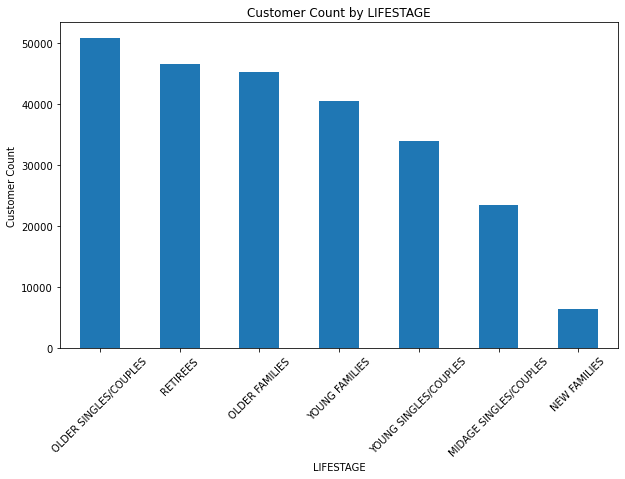

In [193]:
plt.figure(figsize=(10, 6))
full_df['LIFESTAGE'].value_counts().plot(kind='bar')
plt.xlabel('LIFESTAGE')
plt.ylabel('Customer Count')
plt.title('Customer Count by LIFESTAGE')
plt.xticks(rotation=45)
plt.show()

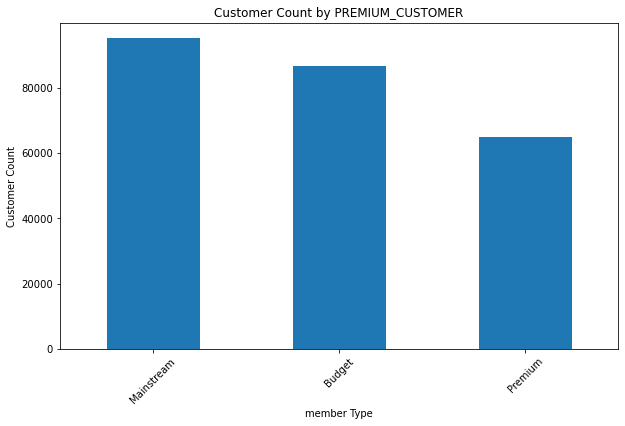

In [192]:
plt.figure(figsize=(10, 6))
full_df['MEMBER_TYPE'].value_counts().plot(kind='bar')
plt.xlabel('member Type')
plt.ylabel('Customer Count')
plt.title('Customer Count by PREMIUM_CUSTOMER')
plt.xticks(rotation=45)
plt.show()

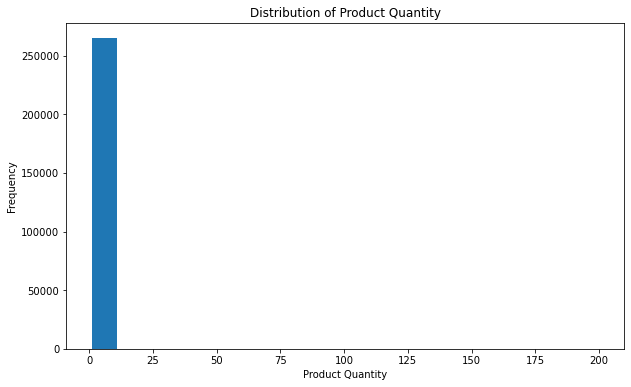

In [26]:
plt.figure(figsize=(10, 6))
df_transaction['PROD_QTY'].plot(kind='hist', bins=20)
plt.xlabel('Product Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Product Quantity')
plt.show()

In [70]:
df_transaction['DATE'].nunique()

1

In [66]:
print(df_transaction['DATE'].dtype)

datetime64[ns]


In [50]:
print(df_transaction['DATE'].value_counts()) #all sales belong to this one date

1970-01-01    264836
Name: DATE, dtype: int64


In [76]:
print(df_transaction['STORE_NBR'].value_counts()) 

226    2022
88     1873
93     1832
165    1819
237    1785
       ... 
11        2
31        2
206       2
76        1
92        1
Name: STORE_NBR, Length: 272, dtype: int64


# What's the average chip price by customer segment

In [199]:
full_df['CHIP_PRICE']=full_df['TOT_SALES']/full_df['PROD_QTY']
d=full_df[['LIFESTAGE','MEMBER_TYPE','CHIP_PRICE']].groupby(['MEMBER_TYPE','LIFESTAGE']).mean()
d.sort_values("CHIP_PRICE",ascending=False)

CHIP_PRICE
MEMBER_TYPE LIFESTAGE                         
Mainstream  YOUNG SINGLES/COUPLES     4.065642
            MIDAGE SINGLES/COUPLES    3.994241
Budget      RETIREES                  3.924404
Premium     RETIREES                  3.920942
Budget      NEW FAMILIES              3.917688
Mainstream  NEW FAMILIES              3.916133
Premium     OLDER SINGLES/COUPLES     3.893182
Budget      OLDER SINGLES/COUPLES     3.882096
Premium     NEW FAMILIES              3.872110
Mainstream  RETIREES                  3.844294
            OLDER SINGLES/COUPLES     3.814665
Premium     MIDAGE SINGLES/COUPLES    3.770698
            YOUNG FAMILIES            3.762150
Budget      YOUNG FAMILIES            3.760737
            OLDER FAMILIES            3.745340
            MIDAGE SINGLES/COUPLES    3.743328
Mainstream  OLDER FAMILIES            3.737077
            YOUNG FAMILIES            3.724533
Premium     OLDER FAMILIES            3.717000
            YOUNG SINGLES/COUPLES     3.665414
Budget      YOUNG SINGLES/COUPLES     3.657366

# Doing t-test on avergae chip price

In [200]:
from scipy import stats
#Mainstream vs premium
stats.ttest_ind([4.065642,3.994241],[3.770698,3.665414])

Ttest_indResult(statistic=4.903408005498769, pvalue=0.039164352682153285)

In [201]:
#Mainstream vs budget
stats.ttest_ind([4.065642,3.994241],[3.657366,3.743328])

Ttest_indResult(statistic=5.898899732826305, pvalue=0.027555775534860754)

The t-test results in a p-value of 0.03 and 0.02 , i.e. the unit price for mainstream,
# young and mid-age singles and couples ARE significantly higher than
# that of budget or premium, young and midage singles and couples.

In [204]:
midage=full_df[(full_df['MEMBER_TYPE']=='Mainstream') & (full_df['LIFESTAGE']=='MIDAGE SINGLES/COUPLES')]
young=full_df[(full_df['MEMBER_TYPE']=='Mainstream') & (full_df['LIFESTAGE']=='YOUNG SINGLES/COUPLES')]
print(f"MIDAGE SINGLES/COUPLES\n{midage['BRAND_NAME'].value_counts().head(5)}")
print(f"YOUNG SINGLES/COUPLES\n{young['BRAND_NAME'].value_counts().head(5)}")

MIDAGE SINGLES/COUPLES
Kettle       2136
Smiths       1276
Doritos      1210
Pringles     1159
Infuzions     679
Name: BRAND_NAME, dtype: int64
YOUNG SINGLES/COUPLES
Kettle       3844
Doritos      2379
Pringles     2315
Smiths       1921
Infuzions    1250
Name: BRAND_NAME, dtype: int64


#kettle,smiths and doritos are popular in midage and kettle is also popular in young couples/singles